Data Visualization

In [1]:
import pytreebank
dataset = pytreebank.load_sst() #load the STB corpus in the PTB format
pytreebank.LabeledTree.inject_visualization_javascript() #add Javascript for Tree visualization
sentence = dataset["train"][0] #visualizing the sentence
sentence.display() #display it in the page

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
#extracting sentence and corresponding labels
import csv

for datafile in ['train', 'test', 'dev']:
    if datafile == 'train' or datafile == 'dev':
        file = 'C:\\Users\\vijayakumar_p\\Desktop\\ds\\data_csv\\train.csv'
    else:
        file = 'C:\\Users\\vijayakumar_p\\Desktop\\ds\\data_csv\\test.csv'
    with open(file , 'a') as f:
        for review in dataset[datafile]: #for each sentence in the file
            i=0
            # extract spans from the tree
            for label, sentence in review.to_labeled_lines():
                if i==0: #considering only the complete sentence
                    entry = [sentence, [1, 2, 3, 4, 5][label]] #sentence and corresponding label
                    csv.writer(f).writerow(entry) #appending the extracted data to csv file
                    i+=1
                else: #ignoring subsequences of the sentences
                    break

Data Exploration

In [3]:
import pandas as pd
#Read train data
train = pd.read_csv(r'C:\Users\vijayakumar_p\Desktop\ds\data_csv\train.csv', header=None, names=['review', 'score'], engine = 'python')
train.head()

,review,score
0,The Rock is destined to be the 21st Century 's...,4
1,The gorgeously elaborate continuation of `` Th...,5
2,Singer/composer Bryan Adams contributes a slew...,4
3,You 'd think by now America would have had eno...,3
4,Yet the act is still charming here .,4


In [4]:
train.shape

(9645, 2)

Text(0, 0.5, 'Label')

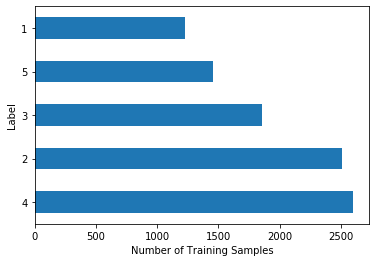

In [5]:
import matplotlib.pyplot as plt
#check for imbalance in data
ax = train['score'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of Training Samples')
ax.set_ylabel('Label')

In [6]:
#Read test data
test = pd.read_csv(r'C:\Users\vijayakumar_p\Desktop\ds\data_csv\test.csv', header=None, names=['review', 'score'], engine = 'python')
test.head()

,review,score
0,Effective but too-tepid biopic,3
1,If you sometimes like to go to the movies to h...,4
2,"Emerges as something rare , an issue movie tha...",5
3,The film provides some great insight into the ...,3
4,Offers that rare combination of entertainment ...,5


In [7]:
test.shape

(2210, 2)

Text(0, 0.5, 'Label')

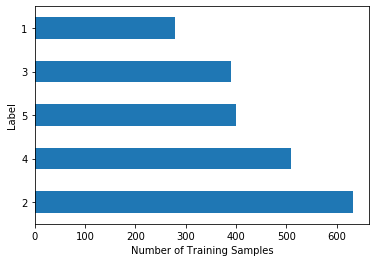

In [8]:
#check for imbalance in data
ax = test['score'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of Training Samples')
ax.set_ylabel('Label')

Text Preprocessing

In [9]:
#cleaning training text
import string
def clean(s):
    s = s.lower() #convert all letters to lowercase
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)]) #eliminate punctuations
    return s
train['review'] = train['review'].apply(clean)
train.head()

,review,score
0,the rock is destined to be the 21st century s ...,4
1,the gorgeously elaborate continuation of the ...,5
2,singercomposer bryan adams contributes a slew ...,4
3,you d think by now america would have had enou...,3
4,yet the act is still charming here,4


In [10]:
#cleaning testing text
test['review'] = test['review'].apply(clean)
test.head()

,review,score
0,effective but tootepid biopic,3
1,if you sometimes like to go to the movies to h...,4
2,emerges as something rare an issue movie that...,5
3,the film provides some great insight into the ...,3
4,offers that rare combination of entertainment ...,5


In [11]:
#converting data to be predicted to categorical type, i.e., understanding as classification problem
train['score'] = train['score'].astype(int).astype('category') #preprocessed, training ready data
test['score'] = test['score'].astype(int).astype('category') #preprocessed, testing ready data

Model Building

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(
            loss='modified_huber',
            penalty='l2',
            alpha=1e-3,
            random_state=42,
            max_iter=100,
            learning_rate='optimal',
            tol=None,
        )),
    ]
)

#training
classifier = pipeline.fit(train['review'], train['score'])

In [13]:
#testing
test['pred'] = classifier.predict(test['review'])

In [14]:
#evaluation
from sklearn.metrics import f1_score, accuracy_score
acc = accuracy_score(test['score'], test['pred'])*100 #calculate accuracy using formula
f1 = f1_score(test['score'], test['pred'], average='macro') #calculate F1 Score using formula
print("Accuracy: {}\nF1-score: {}".format(acc, f1))

Accuracy: 41.49321266968326
F1-score: 0.3525881289205891


Results Visualization

In [15]:
#define confusion matrix plotting as a function
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels, normalize= 'true') #select normalized confusion matrix
    confusionMatx = confusionMatx.astype('float') / confusionMatx.sum(axis=1)[:, np.newaxis] #normalizing confusion matrix values
    sns.set(font_scale=1.5)
    labels = [1, 2, 3, 4, 5] #prediction classes
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels[::-1])
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('True Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.yticks(rotation = 0)
    plt.show()

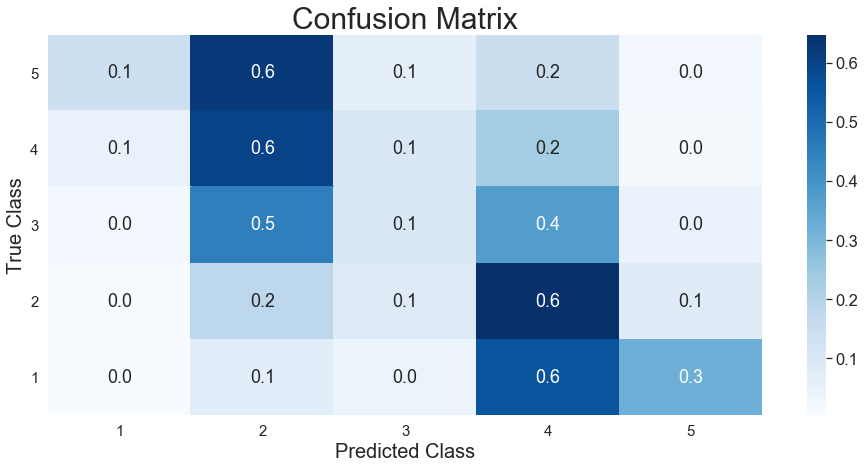

In [16]:
#plot confusion matrix for test data
print_confusionMatrix(test['score'], test['pred'])

Real-world Predictions: Predicting the sentiment score for the amazon reviews collected

In [17]:
#Read scraped data from amazon.in
reviews = pd.read_csv(r'C:\Users\vijayakumar_p\Desktop\ds\test_data\mobile_reviews.csv', engine = 'python')
reviews.head()

,Mobile Phone,Rating,Review Title,Review
0,Oppo Find X2,5,Class at its best...Great experience...true fl...,Used it for a day...it seems perfect as of now...
1,Oppo Find X2,4,1week experience,Totally different experience with the display.
2,Oppo Find X2,1,Worst,Worst
3,Oppo Find X2,1,Oppo find x 2 worse phone,Worse phone ever have ever seen pathetic batte...
4,Oppo Find X2,1,Not even close to oneplus 8 pro,Mediocre phone with high price


In [18]:
#Since our training data had moview reviews and prediction data is mobile reviews, thereby making disjoint sets,
#it becomes quite less accurate when we just feed reviews as input without review titles which are quite generic.
#Also, we cannot just feed review title as well, due to their short length and ambiguous words.
#SO, let us use both review titles and review bodies to predict the sentiment score.
pred_df = reviews['Review Title'] + ' ' + reviews['Review'] #joining/concatenating review titles and review bodies
reviews['Prediction'] = classifier.predict(pred_df) #predict the class/score, and store as a new column in the dataframe

In [19]:
#Read the predictions
reviews.head()

,Mobile Phone,Rating,Review Title,Review,Prediction
0,Oppo Find X2,5,Class at its best...Great experience...true fl...,Used it for a day...it seems perfect as of now...,5
1,Oppo Find X2,4,1week experience,Totally different experience with the display.,5
2,Oppo Find X2,1,Worst,Worst,1
3,Oppo Find X2,1,Oppo find x 2 worse phone,Worse phone ever have ever seen pathetic batte...,2
4,Oppo Find X2,1,Not even close to oneplus 8 pro,Mediocre phone with high price,2


In [20]:
#Export dataframe as csv file with no rows numbering
reviews.to_csv(r'C:\Users\vijayakumar_p\Desktop\ds\test_data\mobile_reviews.csv', index=False)